# 6b Generated Signal Exploration

Events were generated for the process X->YH->HHH->6b using MadGraph and Pythia. This notebook explores the generated signal behaviors and signatures.

In [8]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import vector
# import matplotlib as mpl

from myuproot import open_up
from consistent_plots import hist, hist2d

In [2]:
def plotEff(ax, data, mask, bins, label):
    
    x = (bins[1:] + bins[:-1])/2
    n_denom, bins = np.histogram(data, bins)
    n_num, bins = np.histogram(data[mask], bins)
    
    eff = np.where(n_denom != 0, n_num / n_denom, 0)
    eff = np.where(n_denom == n_num, 1, eff)
    eff = np.where(n_num == 0, 0, eff)
    
    return makePlot(ax, x, weights=eff, bins=bins, label=label)

def p4(pt, eta, phi, m):
    return vector.obj(pt=pt, eta=eta, phi=phi, m=4)

In [25]:
# Open filename, create a tree, branches, and tables.
filename = '../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_2.root'
# filename = '~/public/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root'

_, table, ntab = open_up(filename)

----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
Run                               LumiSec                           Event                             
gen_X_fc_m                        gen_X_fc_pt                       gen_X_fc_eta                      
gen_X_fc_phi                      gen_X_m                           gen_X_pt                          
gen_X_eta                         gen_X_phi                         gen_Y_m                           
gen_Y_pt                          gen_Y_eta                         gen_Y_phi                         
gen_HX_m                          gen_HX_pt                         gen_HX_eta                        
gen_HX_phi                        gen_HY1_m                         gen_HY1_pt 

In [ ]:
# # Open filename, create a tree, branches, and tables.
# filename1 = 'NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root'
# filename2 = 'NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_2021June.root'

# tree1, table1, ntab1 = open_up(filename1)
# tree2, table2, ntab2 = open_up(filename2)

In [20]:
# njet = np.concatenate((ntab1['njet'], ntab2['njet']))

In [26]:
njet = ntab['njet']

KeyError: 'njet'

Text(0.5, 0, '$n_\\mathrm{jet}$')

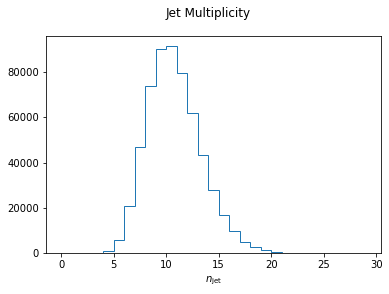

In [23]:
fig, ax = plt.subplots()
fig.suptitle('Jet Multiplicity')

n, b = np.histogram(njet, np.arange(0,njet.max()))
x = (b[:-1] + b[1:])/2

_ = hist(ax, x, weights=n, bins=b)
ax.set_xlabel(r'$n_\mathrm{jet}$')

In [24]:
print(np.average(njet))

10.300642551863607


Generated b quarks and jets are all saved 

In [14]:
HX_b1  = {'pt': t[f'HX_b1_recojet_pt' ],
          'eta':t[f'HX_b1_recojet_eta'],
          'phi':t[f'HX_b1_recojet_phi'],
          'm':  t[f'HX_b1_recojet_m'  ]}
HX_b2  = {'pt': t[f'HX_b2_recojet_pt' ],
          'eta':t[f'HX_b2_recojet_eta'],
          'phi':t[f'HX_b2_recojet_phi'],
          'm':  t[f'HX_b2_recojet_m'  ]}
HY1_b1 = {'pt': t[f'HY1_b1_recojet_pt'],
          'eta':t[f'HY1_b1_recojet_eta'],
          'phi':t[f'HY1_b1_recojet_phi'],
          'm':  t[f'HY1_b1_recojet_m' ]}
HY1_b2 = {'pt': t[f'HY1_b2_recojet_pt'],
          'eta':t[f'HY1_b2_recojet_eta'],
          'phi':t[f'HY1_b2_recojet_phi'],
          'm':  t[f'HY1_b2_recojet_m' ]}
HY2_b1 = {'pt': t[f'HY2_b1_recojet_pt'],
          'eta':t[f'HY2_b1_recojet_eta'],
          'phi':t[f'HY2_b1_recojet_phi'],
          'm':  t[f'HY2_b1_recojet_m' ]}
HY2_b2 = {'pt': t[f'HY2_b2_recojet_pt'],
          'eta':t[f'HY2_b2_recojet_eta'],
          'phi':t[f'HY2_b2_recojet_phi'],
          'm':  t[f'HY2_b2_recojet_m' ]}

part_dict = {0:HX_b1, 1:HX_b2, 2:HY1_b1, 3:HY1_b2, 4:HY2_b1, 5:HY2_b2}
part_name = {0:'HX_b1', 1:'HX_b2', 2:'HY1_b1', 3:'HY1_b2', 4:'HY2_b1', 5:'HY2_b2'}

In [22]:
ptbins = np.linspace(0,400,100)
etabins = np.linspace(-3,3,100)
phibins = np.linspace(-np.pi, np.pi, 100)

plots = ['pt', 'eta', 'phi']
bins = [ptbins, etabins, phibins]
ax_labels = [r'$p_T$ [GeV]', r'$\eta$', r'$\phi$ [rad]']

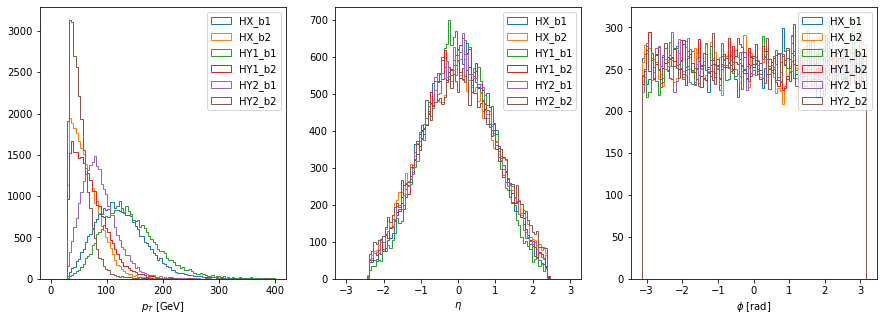

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for n,ax in enumerate(axs):
    for i in range(6):
        hist(ax, part_dict[i][plots[n]], bins=bins[n], label=part_name[i])
    ax.legend()
    ax.set_xlabel(ax_labels[n])

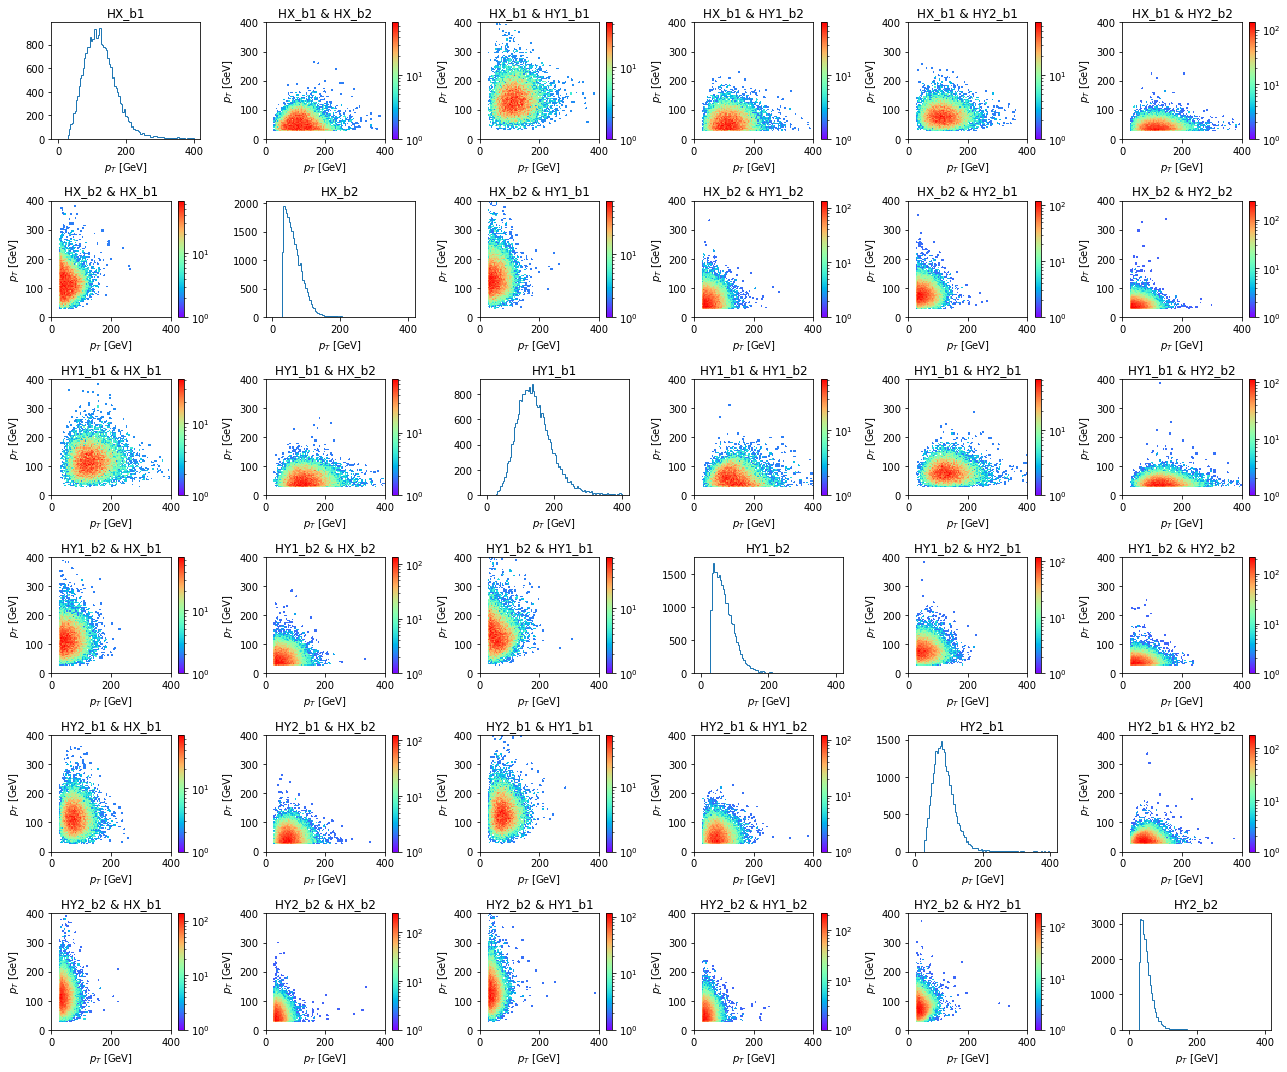

In [37]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(18,15))

for i in range(6):
    for j in range(6):
        ax = axs[i][j]
        ax.set_xlabel(ax_labels[0])
        if i == j: 
            ax.set_title(part_name[i])
            hist(ax, part_dict[i]['pt'], bins=ptbins)
        else:
            n, bx, by, im = hist2d(ax, part_dict[i]['pt'], part_dict[j]['pt'], xbins=ptbins, ybins=ptbins)
            ax.set_ylabel(ax_labels[0])
            ax.set_title(f'{part_name[i]} & {part_name[j]}')
            fig.colorbar(im, ax=ax)

plt.tight_layout()

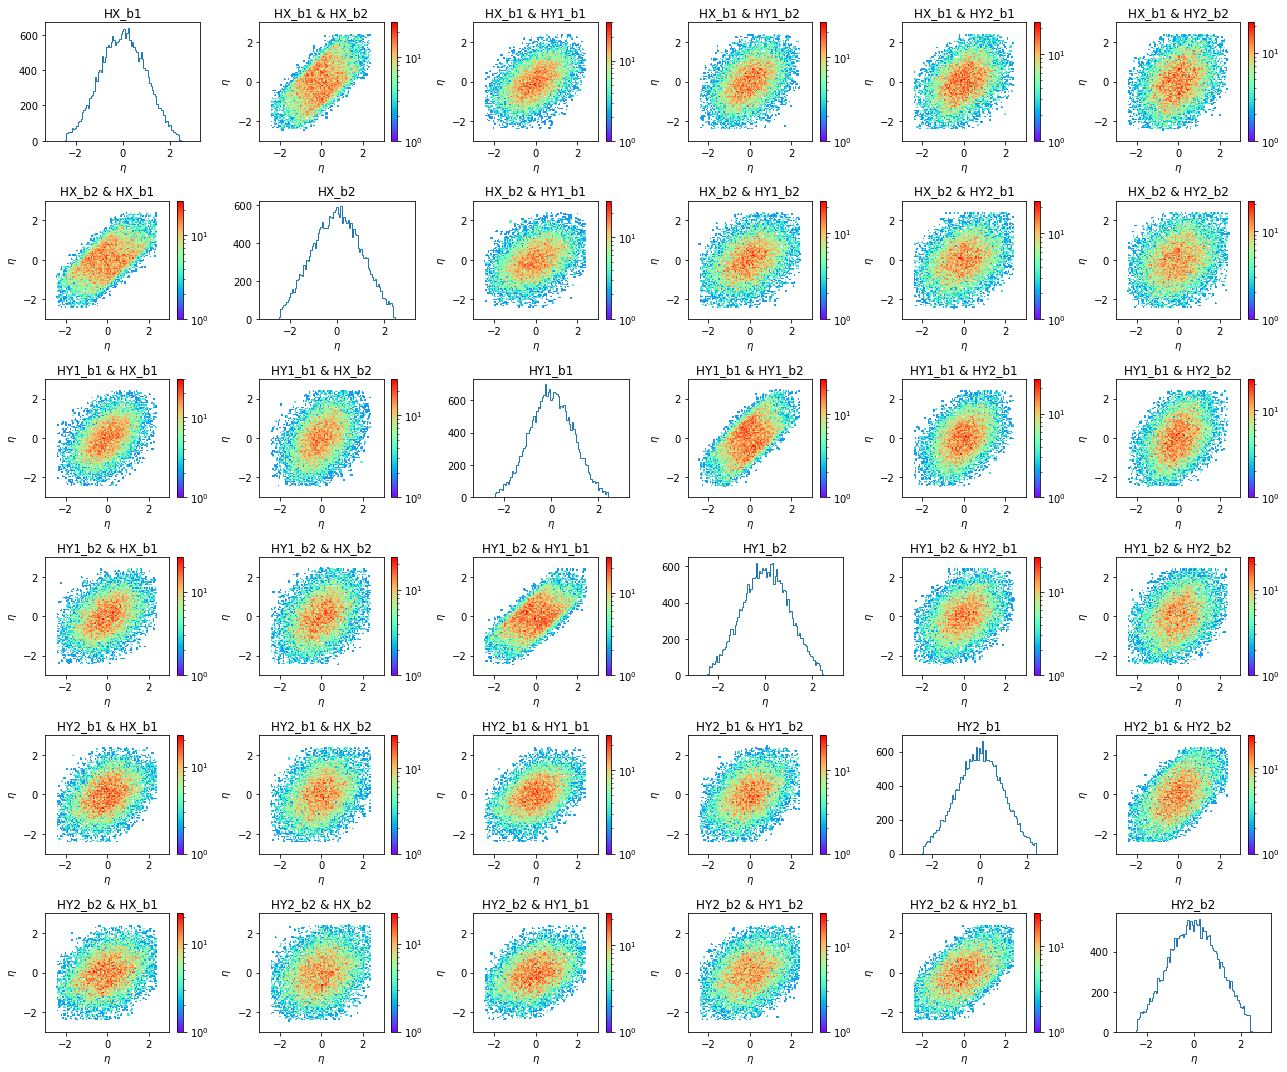

In [38]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(18,15))

for i in range(6):
    for j in range(6):
        ax = axs[i][j]
        ax.set_xlabel(ax_labels[1])
        if i == j: 
            ax.set_title(part_name[i])
            hist(ax, part_dict[i]['eta'], bins=etabins)
        else:
            n, bx, by, im = hist2d(ax, part_dict[i]['eta'], part_dict[j]['eta'], xbins=etabins, ybins=etabins)
            ax.set_ylabel(ax_labels[1])
            ax.set_title(f'{part_name[i]} & {part_name[j]}')
            fig.colorbar(im, ax=ax)

plt.tight_layout()

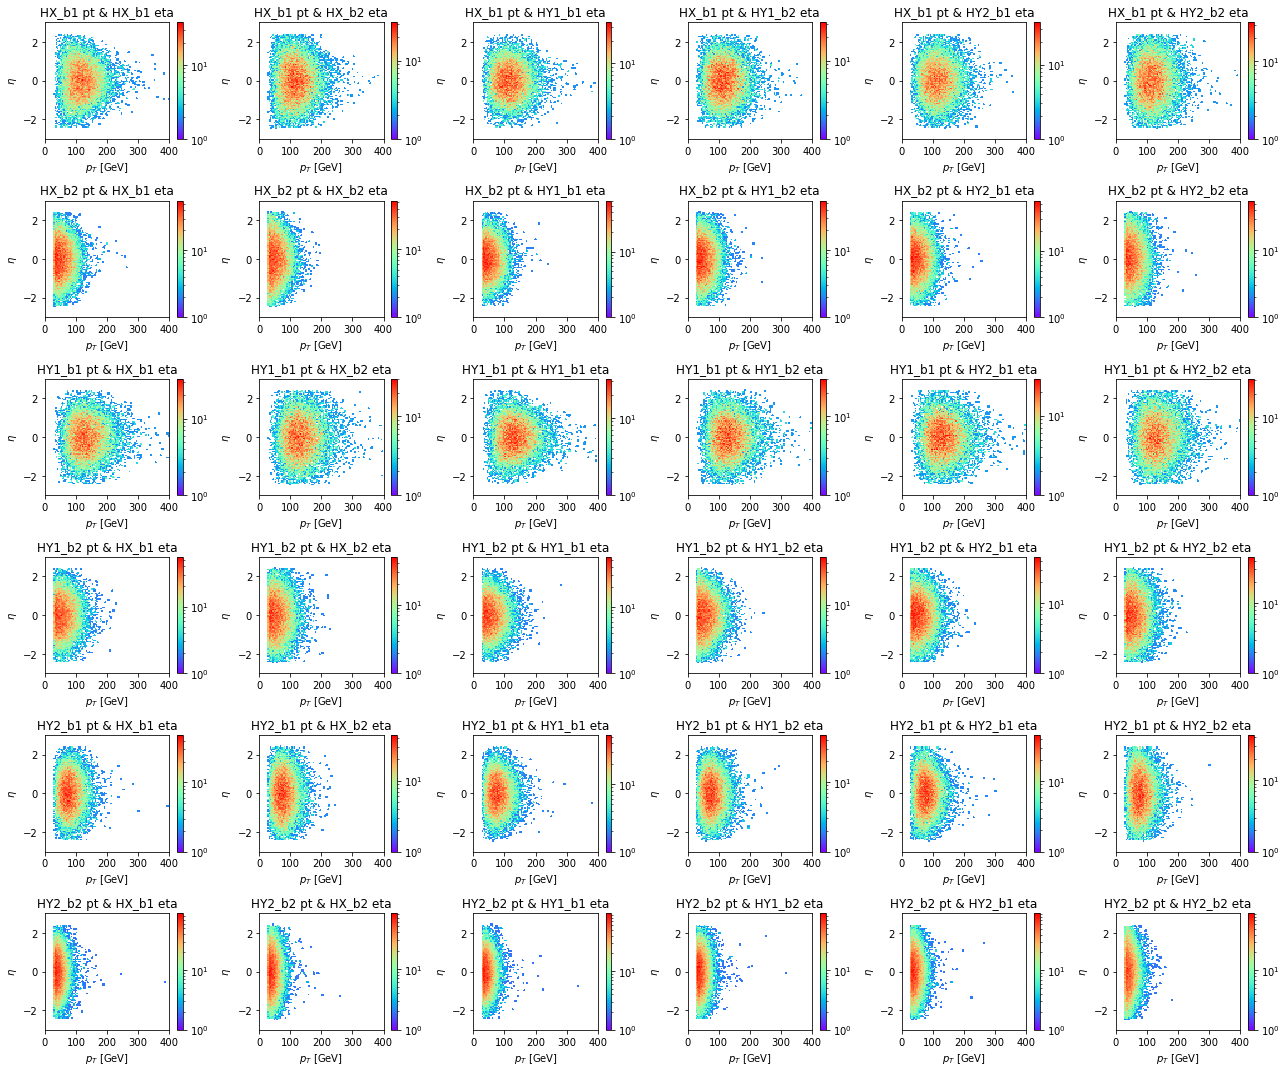

In [42]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(18,15))

for i in range(6):
    for j in range(6):
        ax = axs[i][j]
        n, bx, by, im = hist2d(ax, part_dict[i]['pt'], part_dict[j]['eta'], xbins=ptbins, ybins=etabins)
        ax.set_xlabel(ax_labels[0])
        ax.set_ylabel(ax_labels[1])
        ax.set_title(f'{part_name[i]} pt & {part_name[j]} eta')
        fig.colorbar(im, ax=ax)

plt.tight_layout()